# Morsy
## Speckel 1 vs 2
### 6/24/20

# a. Speckel 1

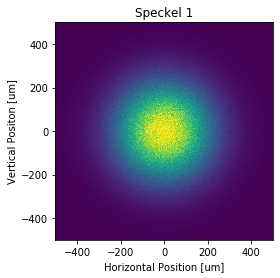

In [7]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
spk_1 = Image.open("C:\\Users\\User\\Downloads\\speckle_one.png", "r" )

%matplotlib inline
dx_m = 1*10**-6  #pixel size in meter
Dx_m = 1e-3      #image full size
extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6) 
plt.imshow(spk_1, extent = extent)
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.title('Speckel 1')
plt.show()

In [8]:
x_m = np.linspace(-Dx_m/2, Dx_m/2, Dx_m/dx_m + 1)
real_axis = x_m
fs = 1/(real_axis[1]-real_axis[0])
Nfft=len(real_axis)
            
df = fs/Nfft
f_cpm = np.linspace(0,(fs-df),Nfft) - (fs-np.mod(Nfft,2)*df)/2

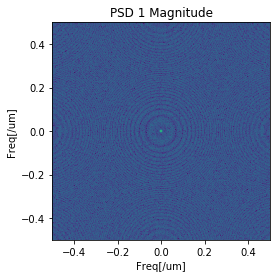

In [9]:
%matplotlib inline
data_1 = np.asarray(spk_1) # Converts the image into a numpy array
Y1 = np.fft.fftshift(np.fft.fft2(data_1))  # it rearranges the fourier transform to make it symetrical about zero

df_cpm = f_cpm[1] - f_cpm[0]  #pixel size in meter
Df_cpm = f_cpm[-1] - f_cpm[0]      #image full size
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

plt.imshow(np.abs(Y1)**0.1, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD 1 Magnitude')
plt.show()

In [10]:
np.shape(np.linspace(0,(fs-df),Nfft))
np.shape(f_cpm)

(1001,)

## Creating a circle on the Image

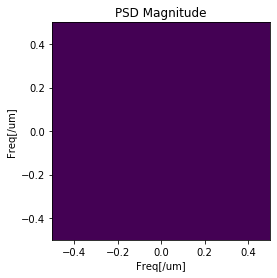

In [11]:
(Fx, Fy) = np.meshgrid(f_cpm, f_cpm)
Z = Fx**2 + Fy**2    # Equation of a circule
r = df_cpm * 100      # Radious of the ring
dr = df_cpm * 1     # Thikness of the ring
#a = np.where(Z >= 10)
#a = np.where(np.abs(Z - 10) < 1) 
a = np.where(np.abs(Z - r**2) < dr**2)   # Creates an array that contained zeros everywhere exept for the radii
A = Z * 0
A[a] = 1


plt.imshow(A, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD Magnitude')
plt.show()

In [13]:
temp_1 = np.abs(Y1) * A
intg_1 = np.sum(temp_1)
intg_1

14205.16410053787

In [14]:
#N = np.size(f_cpm)/2
N = 500
circ_sum_1 = np.zeros(N)
for i in np.arange(N):
    r = df_cpm * i      # Radious of the ring
    dr = df_cpm     # Thikness of the ring
    #a = np.where(np.abs(Z - r**2) <= dr**2)   # Creates an array that contained zeros everywhere exept for the radii
    a = np.where((Z >= r**2) & (Z < (r + dr)**2))
    A = Z * 0
    A[a] = 1
    
    circ_sum_1[i] = np.sum(np.abs(Y1) * A) / np.sum(A)
    temp_1 = np.sum(np.abs(Y1) *A)

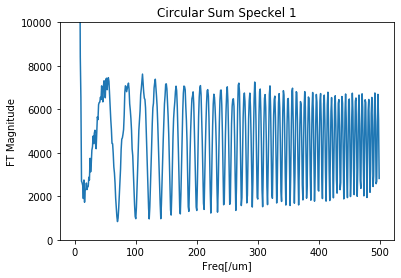

In [15]:
plt.plot(circ_sum_1)
plt.ylim((0, 10000))
plt.title('Circular Sum Speckel 1')
plt.xlabel('Freq[/um]')
plt.ylabel('FT Magnitude')
plt.show()

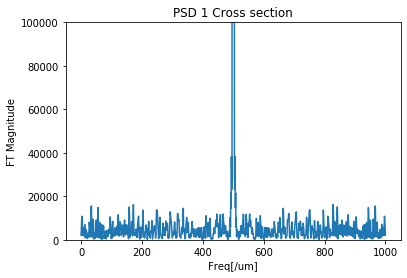

In [18]:
%matplotlib inline
(width, height) = data_1.shape
data_cross_x1 = np.abs(Y1[:, int(np.floor(height/2))])
plt.plot(data_cross_x1)
plt.title('PSD 1 Cross section')
plt.xlabel('Freq[/um]')
plt.ylabel('FT Magnitude')
plt.ylim((0, .1e6))
plt.show()

In [17]:
# finding the phase at the fundemental freq:
x_m = np.linspace(-Dx_m/2, Dx_m/2, Dx_m/dx_m + 1)

f0 =  # The frequency
y_1 =  # PSD 1 Curvefitted

idx_1 = np.where(f_cpm >= f0)[0][0]-1
Y_1 = np.fft.fft(y_1) # this creat a fourier transformation of "y" and assign it a new variable "Y"
Yc_1 = np.fft.fftshift(Y_1)
np.angle(Yc[idx])

SyntaxError: invalid syntax (<ipython-input-17-51a35bc54810>, line 4)

# b. Speckel 2:

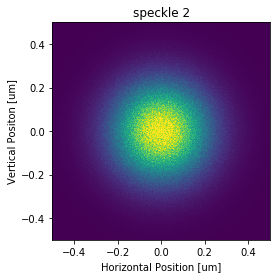

In [66]:
spk_2 = Image.open("C:\\Users\\User\\Downloads\\speckle_two.png", "r" )

%matplotlib inline
plt.imshow(spk_2, extent = extent)
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.title('speckle 2')
plt.show()

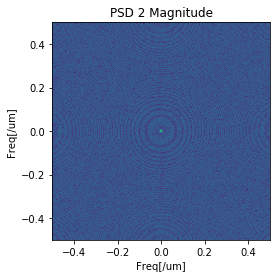

In [67]:
%matplotlib inline
data_2 = np.asarray(spk_2) # Converts the image into a numpy array
Y2 = np.fft.fftshift(np.fft.fft2(data_2))  # it rearranges the fourier transform to make it symetrical about zero

df_cpm = f_cpm[1] - f_cpm[0]  #pixel size in meter
Df_cpm = f_cpm[-1] - f_cpm[0]      #image full size
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

plt.imshow(np.abs(Y)**0.1, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD 2 Magnitude')
plt.show()

In [68]:
temp_2 = np.abs(Y2) * A
intg_2 = np.sum(temp_2)
intg

14205.16410053787

In [69]:
circ_sum_2 = np.zeros(N)
for i in np.arange(N):
    r = df_cpm * i      # Radious of the ring
    dr = df_cpm     # Thikness of the ring
    #a = np.where(np.abs(Z - r**2) <= dr**2)   # Creates an array that contained zeros everywhere exept for the radii
    a = np.where((Z >= r**2) & (Z < (r + dr)**2))
    A = Z * 0
    A[a] = 1
    
    circ_sum_2[i] = np.sum(np.abs(Y2) * A) / np.sum(A)
    temp_2 = np.sum(np.abs(Y2) *A)

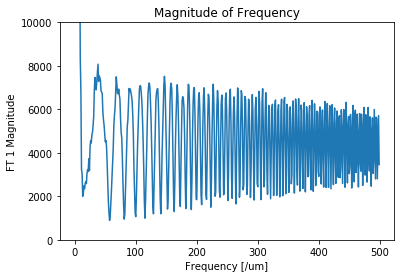

ValueError: x and y must have same first dimension, but have shapes (1001,) and (500,)

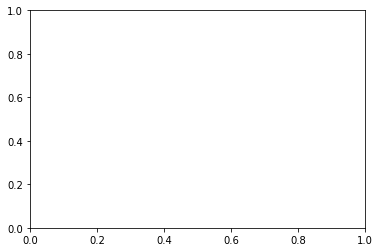

In [78]:
plt.plot(circ_sum_2)
plt.ylim((0, 10000))
plt.title('Magnitude of Frequency')
plt.xlabel('Frequency [/um]')
plt.ylabel('FT 1 Magnitude')
plt.show()
plt.plot(f_cpm/2 -1, circ_sum_2)

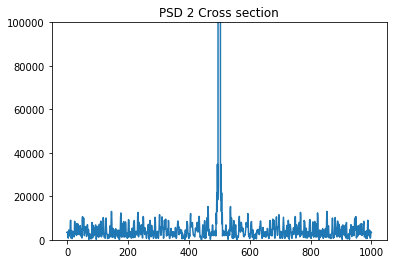

In [73]:
%matplotlib inline
(width, height) = data_2.shape
data_cross_x2 = np.abs(Y2[:, int(np.floor(height/2))])
plt.plot(data_cross_x2)
plt.title('PSD 2 Cross section')
plt.ylim((0, .1e6))
plt.show()

In [ ]:
# finding the phase at the fundemental freq:

x_s = np.linspace(0,10,1001) # define the x-axis as an array
f0 = 1 # giving a value for the frequency
y = np.cos(2*np.pi*f0*x_s+ 1) #adding a phase shift that corresponds to the element 510 in f_cpm array
idx = np.where(f_cpm >= f0)[0][0]-1
Y = np.fft.fft(y) # this creat a fourier transformation of "y" and assign it a new variable "Y"
Yc = np.fft.fftshift(Y)
np.angle(Yc[idx])